## **Importing Required Packages**

In [1]:
import numpy as np ## Linear Algebra
import pandas as pd ## To work with data
import plotly.express as px ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visuaization
from plotly import tools ## Visualization
import os
import seaborn as sns

## **Reading the DataSet**

In [2]:
data = pd.read_csv("crop_production.csv")
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
# Basic Information about dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


## **Cheacking For Null Values**

In [4]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
data.size

1722637

In [6]:
# Droping the NA values:
data.dropna(inplace=True)

# **Exploratory Data Analysis**



## Checking for Correlation between variables



<AxesSubplot:>

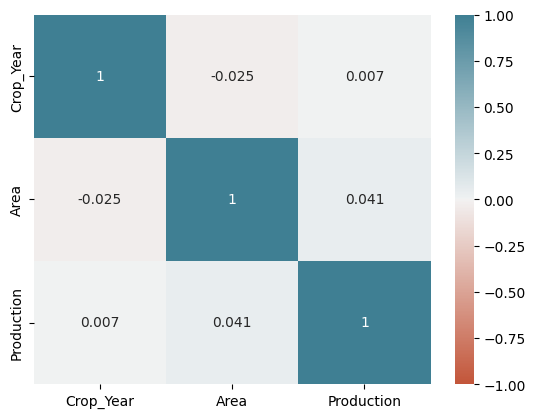

In [7]:
plt.tick_params(labelsize=10)
sns.heatmap(data.corr(),annot=True,cmap=sns.diverging_palette(20, 220, as_cmap=True),vmin=-1, vmax=1)



*   There is no variable showing high correlation with any other variable in the dataset.








#### Checking for Correlation between variables


In [8]:
# State-Wise Production:
pro = data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(pro, y = 'State_Name', x = 'Production',orientation= 'h')


*   Kerala is the highest crops producing state overall. It had produced more than 500% crop than it's runner up state Andhra Pradesh.





## District wise crop production

In [9]:
temp = data.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')

###District Having Highest Crop Production



In [10]:
temp1 = temp.tail()
trace1 = px.bar(temp1, y= 'District_Name', x='Production', title = 'Highest crop production District',orientation= 'h')
trace1.show()


##### District Having Lowest Crop Production

In [11]:
temp2 = temp.head()
trace2 = px.bar(temp2, x= 'District_Name', y='Production', title = 'Lowest crop production District')
trace2.show()

##### Yearly Crop Production

In [12]:
# Yearly Production:

yr = data.groupby("Crop_Year")["Production"].agg("sum")
fig = px.line(yr, y = 'Production', markers = True)
fig.show()



*  High productive years are 2011, 2013 and 2014.



## Area under Agriculture  state-wise 

In [13]:
# State-Wise Area of Cultivation:
pro = data.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area')
pro

,State_Name,Area
5,Chandigarh,1.250200e+04
0,Andaman and Nicobar Islands,3.370834e+05
7,Dadra and Nagar Haveli,3.965150e+05
23,Puducherry,5.487360e+05
20,Mizoram,9.936402e+05
8,Goa,1.205678e+06
26,Sikkim,1.524479e+06
18,Manipur,2.007254e+06
19,Meghalaya,4.035028e+06
2,Arunachal Pradesh,4.364340e+06


In [14]:
fig = px.bar(pro, x='State_Name', y='Area', color='Area')
fig.show()


* Uttar Pradesh have larger area under agriculture
* followed by Madhya Pradesh and Maharastra 
* Chandigarh have the lowest area under agriculter 








## Area Under Agriculture  Over the Years

In [15]:
temp = data.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.line(temp, 'Crop_Year', 'Area', markers = True, title = 'Area under Agriculture  by Year')



*   As we can see by the year the Area Under Agriculture  is coming down gradually.




## Seasonal Production in India 

In [16]:
# Seasonal Crop Production
pro = data.groupby(by='Season')['Production'].sum()
fig = px.bar(pro)
fig.show()



*  We can see that most of the production in india is are the Crops that can be grow **whole year** 




## Top Crops that are produced in India

In [17]:
temp = data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(5), 'Crop', 'Production', color='Production')

# Crop types Cultivated In India 

In [18]:
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

In [19]:
crops = data['Crop']
data['cat_crop']= data['Crop'].apply(cat_crop)

In [20]:
pro = data.groupby("cat_crop")["Production"].agg("count")
fig = px.bar(pro,y = 'Production',title="Crop wise Production in India ")
fig.show()



* Top crop categories are Cereal, Pulses and Oilseeds.




# Different proportion of Crop Categories for India

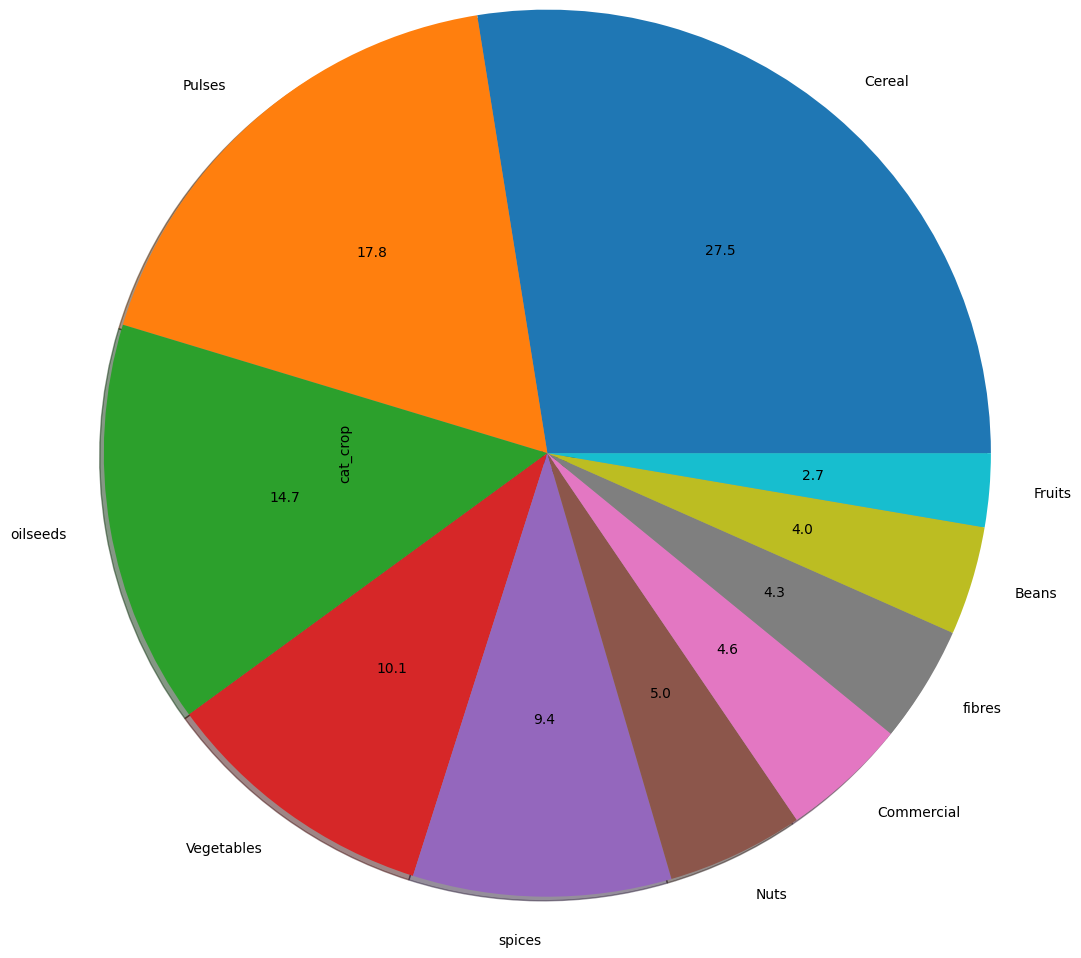

In [21]:
df1 = data["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6,shadow = True)
plt.tick_params(labelsize=10)

In [22]:
df1.head()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Name: cat_crop, dtype: int64

#Each type of crops required various area & various season

In [23]:
temp1 = data.groupby(by='Crop_Year')['Area'].mean().reset_index()
temp2 = data.groupby(by='Crop_Year')['Production'].sum().reset_index()
df = pd.merge(temp1, temp2, on='Crop_Year')
df

,Crop_Year,Area,Production
0,1997,26038.324081,8.512329e+08
1,1998,14795.911383,5.825321e+09
2,1999,12749.174021,6.434666e+09
3,2000,12195.811997,7.449709e+09
4,2001,12434.568019,7.465541e+09
5,2002,9514.310063,7.696955e+09
6,2003,9905.217197,7.917974e+09
7,2004,12105.398306,8.189462e+09
8,2005,12051.210715,8.043757e+09
9,2006,12205.838055,8.681913e+09


# **Rice**

In [24]:
rice_df = data[data["Crop"]=="Rice"]
rice_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Cereal
...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,Cereal
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,Cereal
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,Cereal
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,Cereal


<AxesSubplot:xlabel='Season', ylabel='Production'>

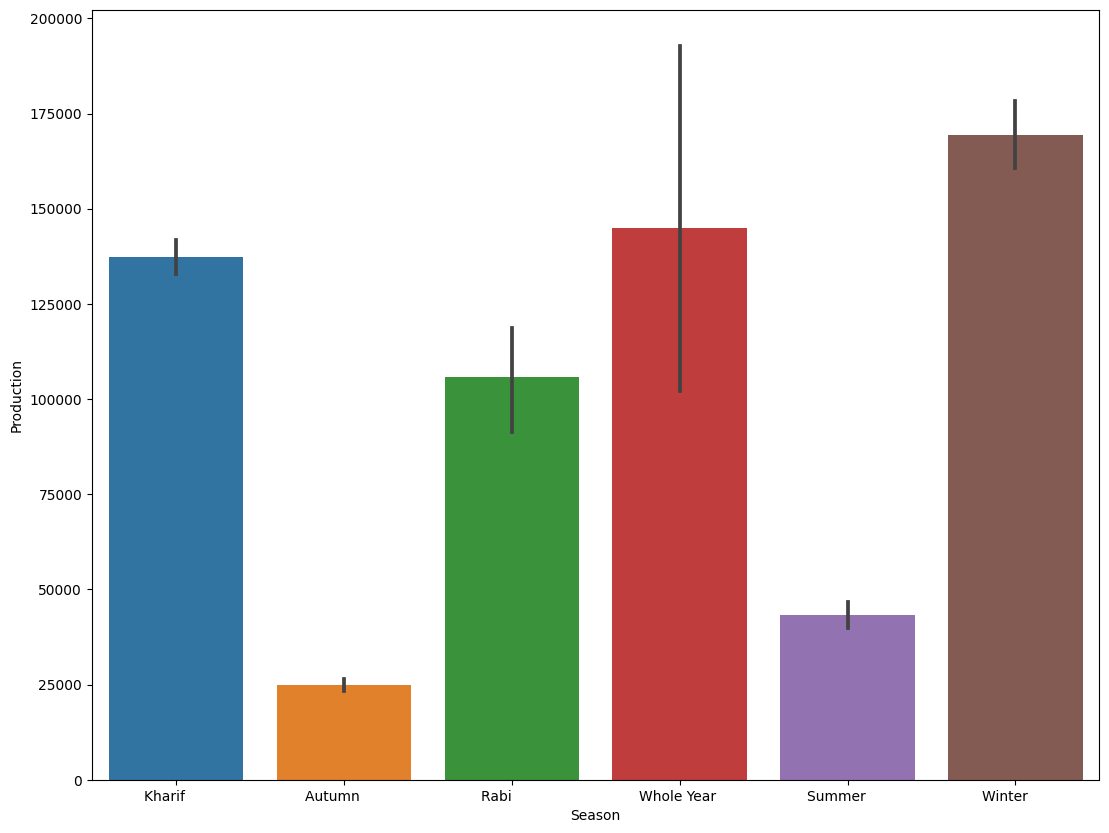

In [25]:
# Rice Production:

plt.figure(figsize=(13,10))
sns.barplot(x = "Season", y = "Production",data=rice_df)

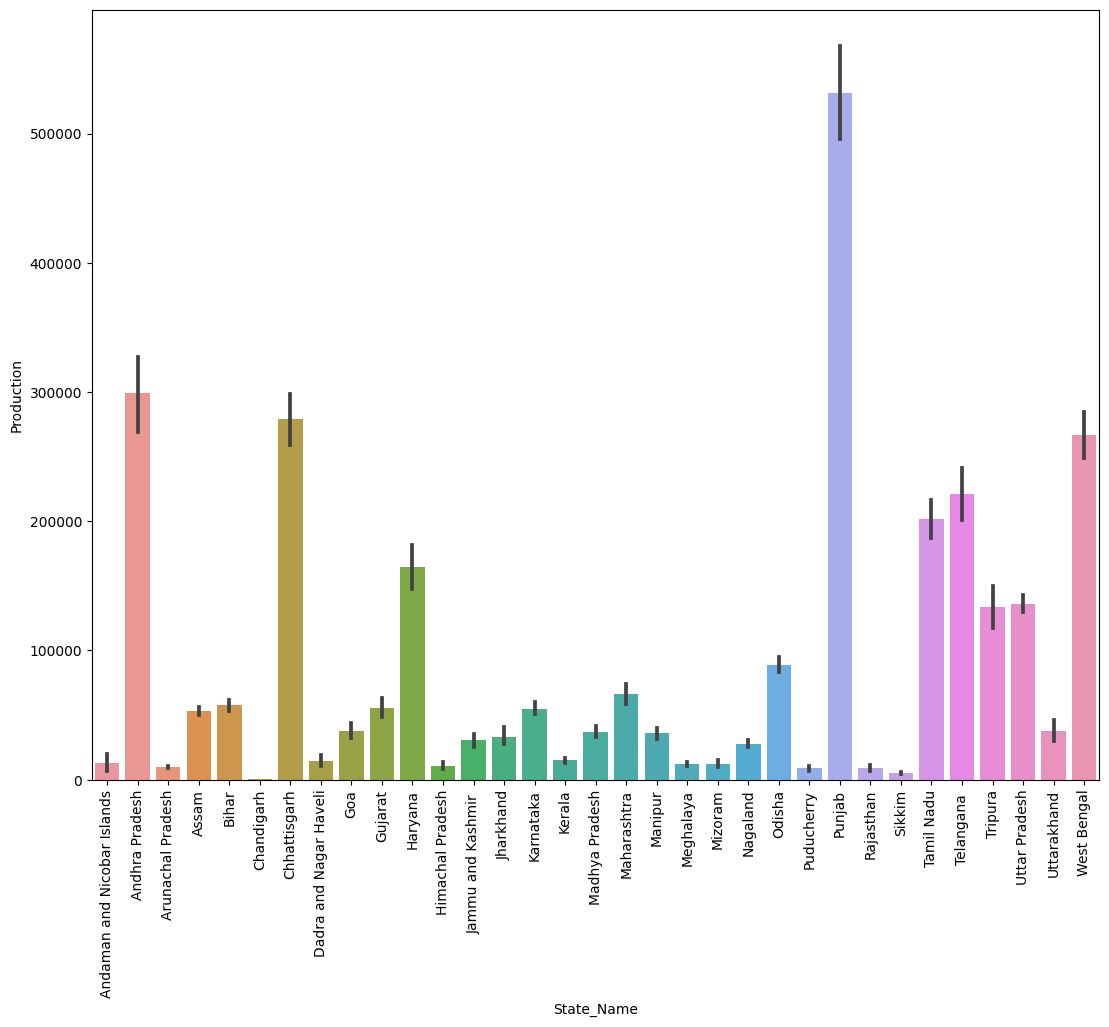

In [26]:
# State-Rice Production:

plt.figure(figsize=(13,10))
sns.barplot(x= "State_Name",y = "Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

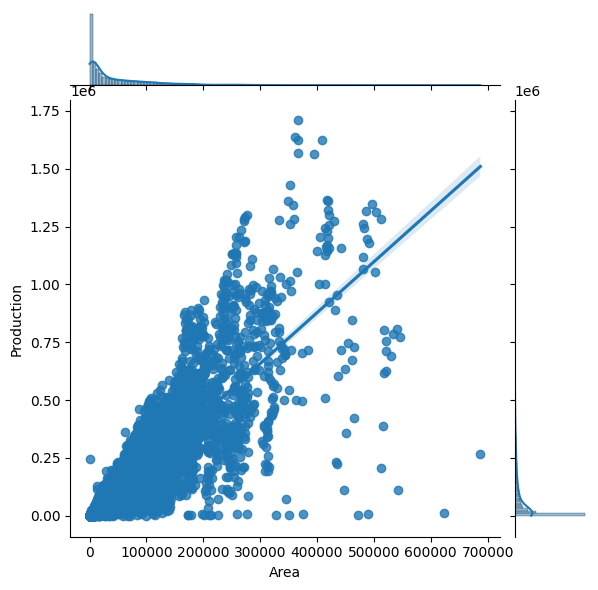

In [27]:
# Area-Wise Rice Production:
sns.jointplot(x = "Area",y = "Production",data=rice_df,kind="reg")
plt.show()

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

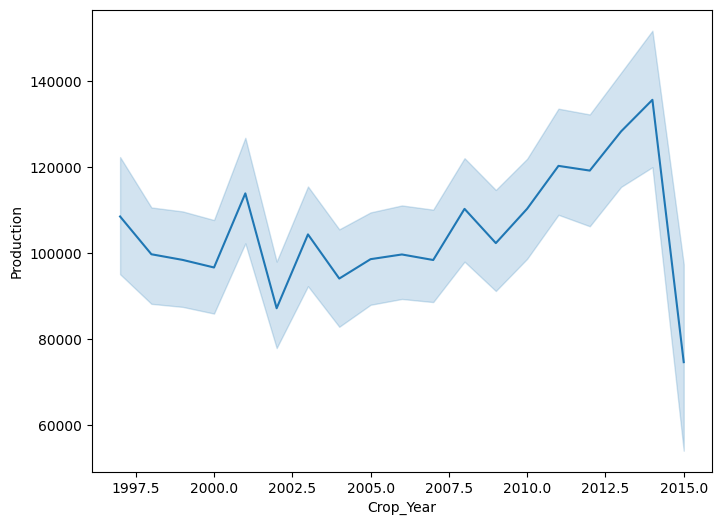

In [28]:
# Rice Production Over the Year:

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=rice_df,x='Crop_Year',y='Production')

# Insight
* From Data Visualization: Rice production is mostly depends on Season, Area, State(place).



# **Coconut**

In [29]:
coc_df = data[data["Crop"]=="Coconut "]
coc_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,None
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,None
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,None
...,...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1,None
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0,None
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0,None
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0,None


<AxesSubplot:xlabel='Season', ylabel='Production'>

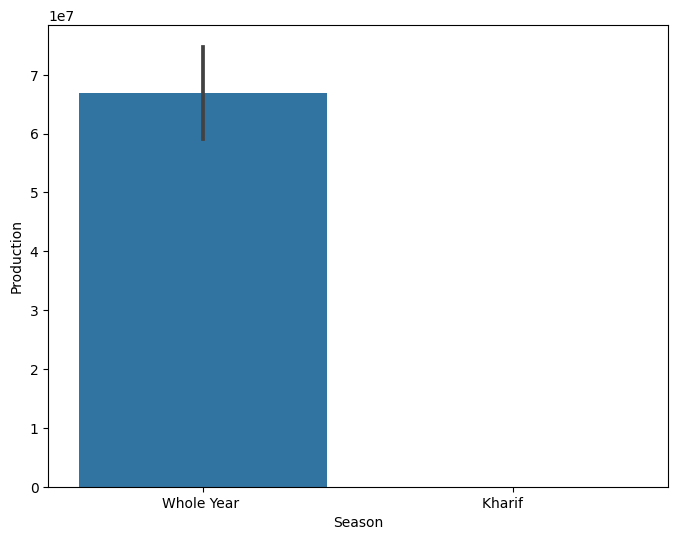

In [30]:
# Sesonal Coconut Production:
plt.figure(figsize=(8,6))
sns.barplot(x= "Season",y="Production",data=coc_df)

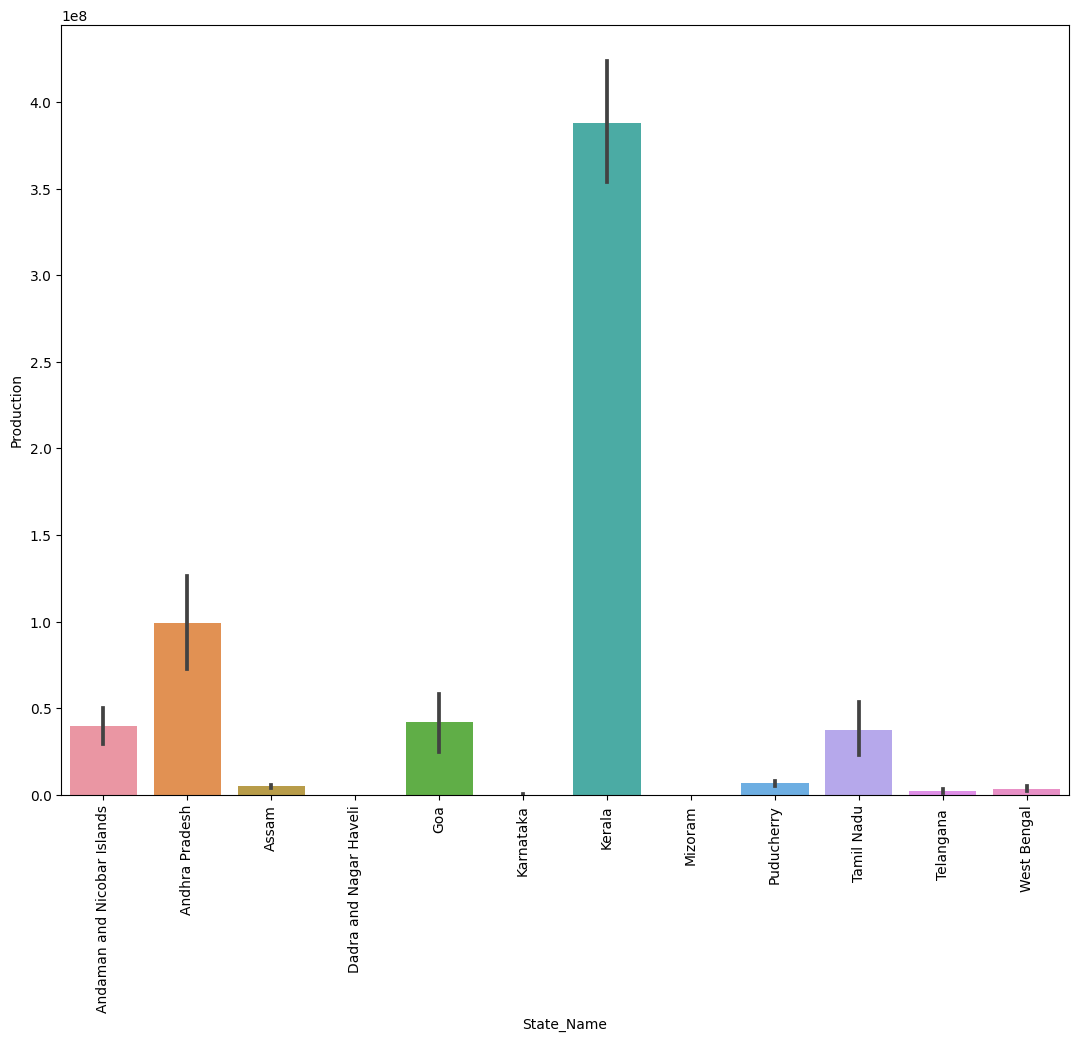

In [31]:
# State-Wise Coconut Production:

plt.figure(figsize=(13,10))
sns.barplot(x = "State_Name",y = "Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

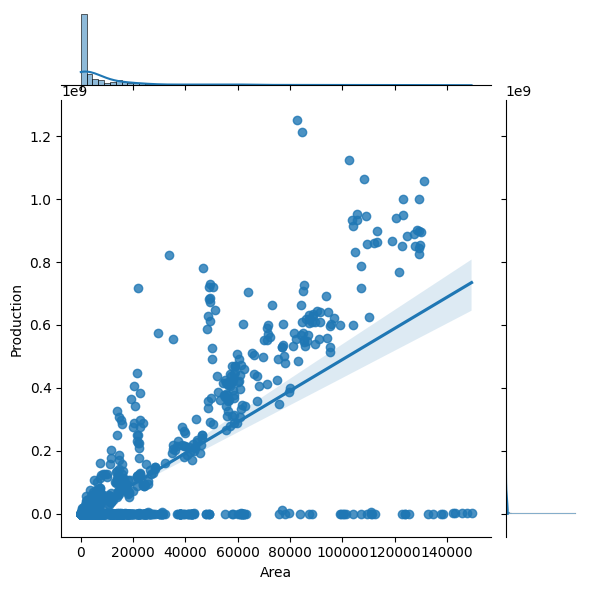

In [32]:
# Area Wise Coconut Production:

sns.jointplot(x= "Area",y = "Production",data=coc_df,kind="reg")

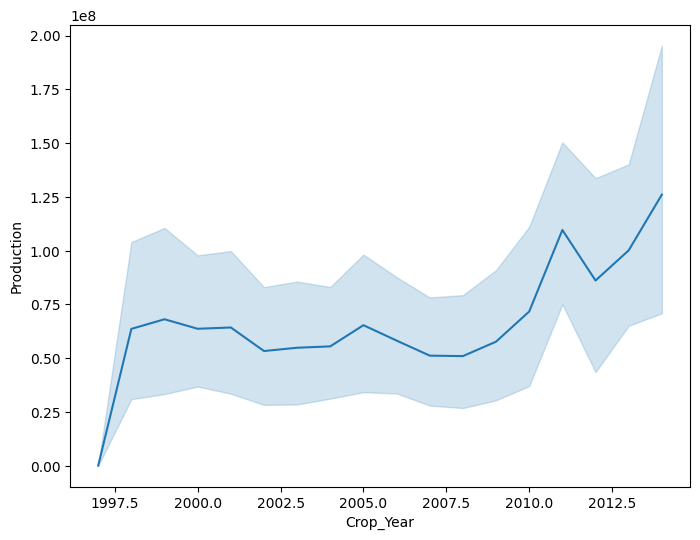

In [33]:
# Cocunut Production Over the Year:

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=coc_df,x='Crop_Year',y='Production');

# Insight from Cocunut Production
* Cocunut production is directly proportional to area.
* Its production is also gradually increasing over a time of period.
* Production is highin kerala state.
* It does not depends on season.
* Production is Increasing by year


# **Sugarcane**

In [34]:
sug_df = data[data["Crop"]=="Sugarcane"]
sug_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Commercial
...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,Commercial


<AxesSubplot:xlabel='Season', ylabel='Production'>

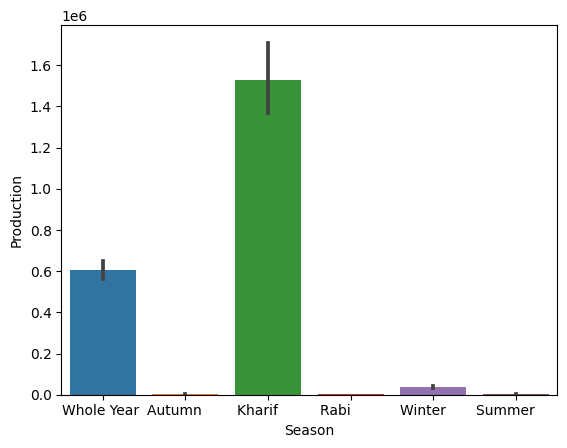

In [35]:
# Sesonal Sugarcane Production:

sns.barplot(x= "Season",y="Production",data=sug_df)

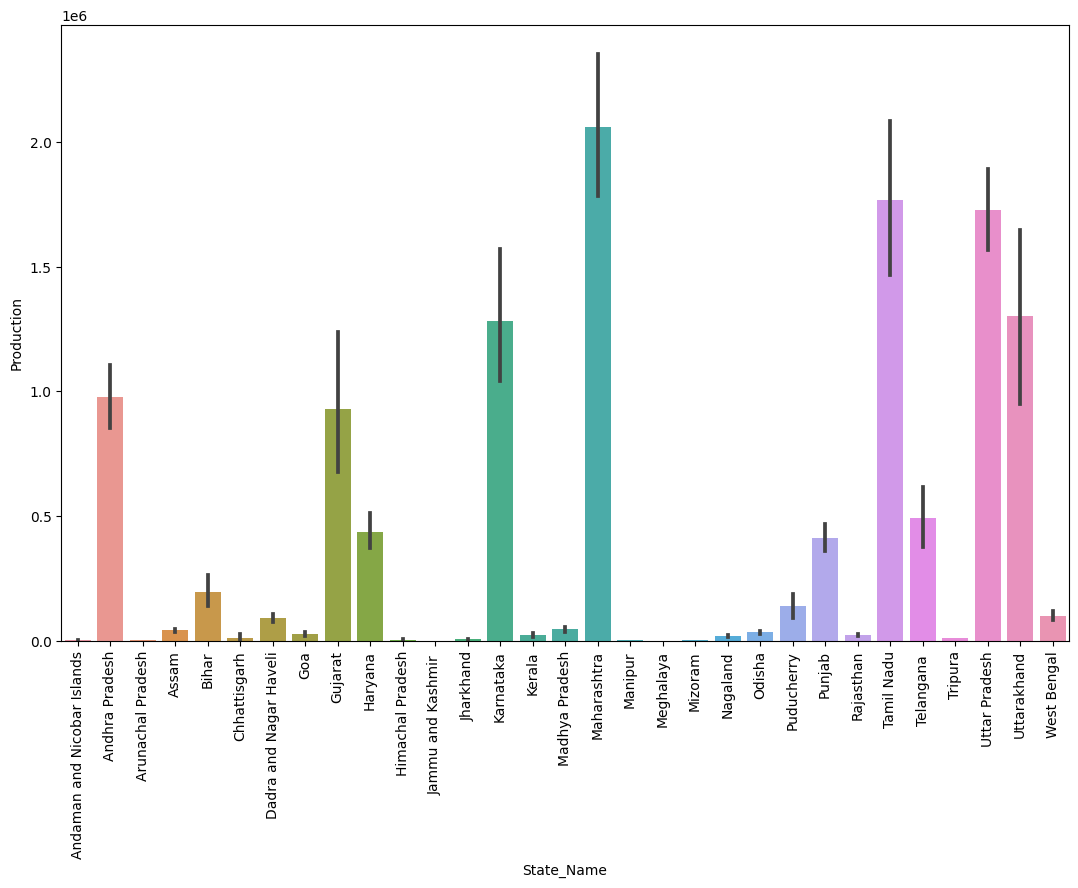

In [36]:
# State Wise Sugarcane Production:

plt.figure(figsize=(13,8))
sns.barplot(x = "State_Name", y = "Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

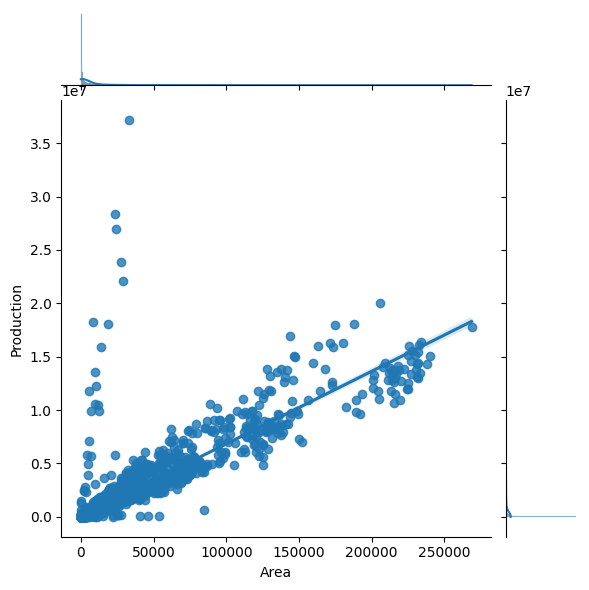

In [37]:
# Area Wise Sugarcane Production:

sns.jointplot(x= "Area",y = "Production",data=sug_df,kind="reg")

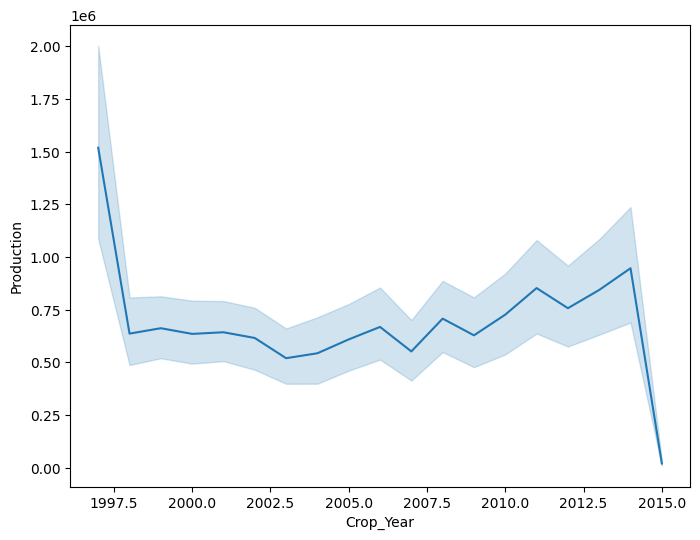

In [38]:
# Sugarcane Production Over the Years:

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=sug_df,x='Crop_Year',y='Production');

# Insight from Sugarcane Production:

* Sugarecane production is directly proportional to area
* And the production is high in some state only
* Production is Decreasing over the Year.